In [1]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [2]:
RD = [-0.43, -0.31, -0.47, -0.47, -0.33, -0.60, -0.80, -0.99, -0.99, -0.99, -0.99, -0.99, -0.34
      , -0.34, -0.34, -0.34, -0.34, -0.34, -0.34, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61,
      -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61]
SMP = list(np.arange(1.2, 5.1, 0.1))

pr = [100]
smp = [1]

for i in range(0,len(RD)):
    dp = (SMP[i]-smp[-1])/smp[-1]
    dd = dp*(RD[i])
    pr.append((1+dd)*pr[-1])
    smp.append(SMP[i])

<AxesSubplot:>

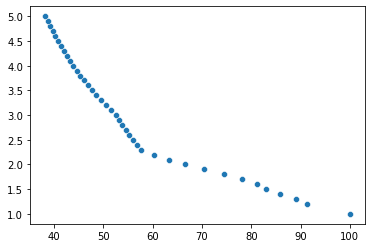

In [3]:
sns.scatterplot(x=pr, y=smp)

In [2]:
table = pd.DataFrame(columns=['time', 'upto_1', 'upto_2', 'upto_3', 'upto_4', 'upto_5', 'above_5'])
table.time = ['8:00-9:00', '9:00-10:00', '10:00-11:00', '11:00-12:00', '12:00-13:00', '13:00-14:00', 
              '14:00-15:00', '15:00-16:00']
table

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5
0,8:00-9:00,NaN,NaN,NaN,NaN,NaN,NaN
1,9:00-10:00,NaN,NaN,NaN,NaN,NaN,NaN
2,10:00-11:00,NaN,NaN,NaN,NaN,NaN,NaN
3,11:00-12:00,NaN,NaN,NaN,NaN,NaN,NaN
4,12:00-13:00,NaN,NaN,NaN,NaN,NaN,NaN
5,13:00-14:00,NaN,NaN,NaN,NaN,NaN,NaN
6,14:00-15:00,NaN,NaN,NaN,NaN,NaN,NaN
7,15:00-16:00,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
table2 = pd.DataFrame(columns=['time', 'upto_1', 'upto_2', 'upto_3', 'upto_4', 'upto_5', 'above_5'])
table2.time = ['11:00-12:00', '12:00-13:00', '13:00-14:00', 
              '14:00-15:00', '15:00-16:00', '16:00-17:00','17:00-18:00','18:00-19:00']
table2

,time,upto_1,upto_2,upto_3,upto_4,upto_5,above_5
0,11:00-12:00,NaN,NaN,NaN,NaN,NaN,NaN
1,12:00-13:00,NaN,NaN,NaN,NaN,NaN,NaN
2,13:00-14:00,NaN,NaN,NaN,NaN,NaN,NaN
3,14:00-15:00,NaN,NaN,NaN,NaN,NaN,NaN
4,15:00-16:00,NaN,NaN,NaN,NaN,NaN,NaN
5,16:00-17:00,NaN,NaN,NaN,NaN,NaN,NaN
6,17:00-18:00,NaN,NaN,NaN,NaN,NaN,NaN
7,18:00-19:00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
path = 'sim200l7.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 8
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    table.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table.at[i, 'upto_3'] =100*len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')]) /len(x)
    table.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table.at[i, 'upto_5'] =100*len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')]) /len(x)
    table.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)

table.drop(['upto_2','upto_4'],inplace=True,axis=1)    
table

,time,upto_1,upto_3,upto_5,above_5
0,8:00-9:00,27.364865,7.347973,7.010135,42.905405
1,9:00-10:00,17.504488,11.310592,8.078995,37.432675
2,10:00-11:00,40.936255,11.85259,5.079681,18.326693
3,11:00-12:00,25.626741,9.192201,7.520891,35.004643
4,12:00-13:00,35.005118,14.738997,6.141249,11.36131
5,13:00-14:00,15.799087,8.949772,5.479452,51.324201
6,14:00-15:00,11.934901,12.929476,9.584087,39.240506
7,15:00-16:00,12.860676,10.63479,7.749382,48.227535


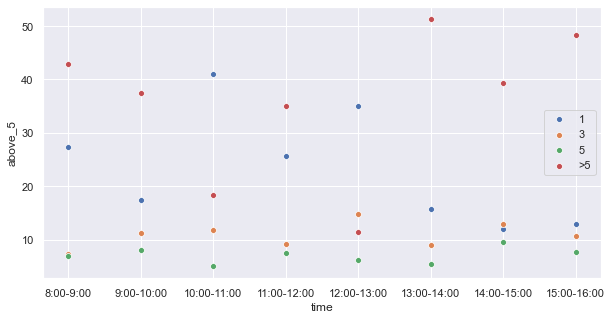

In [8]:
sns.scatterplot(x='time', y='upto_1',data=table,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table2,label='2')
sns.scatterplot(x='time', y='upto_3',data=table,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table2,label='4')
sns.scatterplot(x='time', y='upto_5',data=table,label='5')
sns.scatterplot(x='time', y='above_5',data=table,label='>5')
sns.set(rc={'figure.figsize':(10,6)})


plt.legend()






In [43]:
df.loc[(pd.Timestamp('1900-01-01 08:00:00')<=df.time) & (df.time<=pd.Timestamp('1900-01-01 16:00:00'))]

,Unnamed: 0,request_id,origin,bucket,zone,time
0,0,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
1,1,3196,1657457051,rej_upto1,87196824dffffff,1900-01-01 08:01:00
2,2,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
3,3,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
4,4,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
...,...,...,...,...,...,...
8765,2682,8539,46393690,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8766,2683,172,324022023,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8767,2684,7864,27219290,acc_above5,871969530ffffff,1900-01-01 15:55:00
8768,2685,1589,46429524,acc_above5,871969c9bffffff,1900-01-01 15:59:00


In [36]:
df.loc[(pd.Timestamp('1900-01-01 08:00:00')<df.time) & (df.time<pd.Timestamp('1900-01-01 16:00:00'))]

,Unnamed: 0,request_id,origin,bucket,zone,time
0,0,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
1,1,3196,1657457051,rej_upto1,87196824dffffff,1900-01-01 08:01:00
2,2,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
3,3,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
4,4,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
...,...,...,...,...,...,...
8765,2682,8539,46393690,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8766,2683,172,324022023,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8767,2684,7864,27219290,acc_above5,871969530ffffff,1900-01-01 15:55:00
8768,2685,1589,46429524,acc_above5,871969c9bffffff,1900-01-01 15:59:00


In [17]:
x = df.loc[(pd.Timestamp('1900-01-01 08:00:00')<df.time) & (df.time<pd.Timestamp('1900-01-01 09:00:00'))]

In [28]:
df

,Unnamed: 0,request_id,origin,bucket,zone,time
0,0,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
1,1,3196,1657457051,rej_upto1,87196824dffffff,1900-01-01 08:01:00
2,2,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
3,3,5214,46244565,rej_upto1,871969521ffffff,1900-01-01 08:01:00
4,4,2527,46499650,rej_upto1,871969c9dffffff,1900-01-01 08:01:00
...,...,...,...,...,...,...
8765,2682,8539,46393690,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8766,2683,172,324022023,acc_above5,871969c9bffffff,1900-01-01 15:58:00
8767,2684,7864,27219290,acc_above5,871969530ffffff,1900-01-01 15:55:00
8768,2685,1589,46429524,acc_above5,871969c9bffffff,1900-01-01 15:59:00


In [9]:
path = 'sim200l7v2.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 11
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table2.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    # table2.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table2.at[i, 'upto_3'] =100*(len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')])+len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')])) /len(x)
    # table2.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table2.at[i, 'upto_5'] =100*(len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')])+len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')])) /len(x)
    table2.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)

    
table2.drop(['upto_2','upto_4'],inplace=True,axis=1)
table2

,time,upto_1,upto_3,upto_5,above_5
0,11:00-12:00,61.764706,11.764706,6.27451,20.196078
1,12:00-13:00,40.204082,35.0,12.959184,11.836735
2,13:00-14:00,24.570912,25.293586,15.627823,34.507678
3,14:00-15:00,26.96737,30.806142,18.618042,23.608445
4,15:00-16:00,19.329214,31.421006,14.386584,34.863195
5,16:00-17:00,13.560886,21.863469,20.756458,43.819188
6,17:00-18:00,4.851752,11.051213,12.578616,71.518419
7,18:00-19:00,21.047619,28.952381,14.666667,35.333333


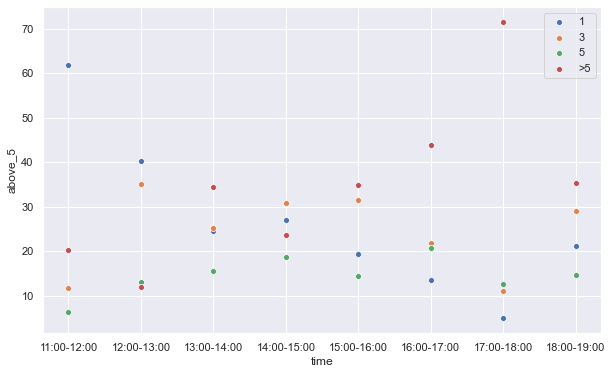

In [10]:
sns.scatterplot(x='time', y='upto_1',data=table2,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table2,label='2')
sns.scatterplot(x='time', y='upto_3',data=table2,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table2,label='4')
sns.scatterplot(x='time', y='upto_5',data=table2,label='5')
sns.scatterplot(x='time', y='above_5',data=table2,label='>5')
sns.set(rc={'figure.figsize':(4,3)})


plt.legend()






In [11]:
path = 'sim300l7.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 8
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    # table2.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table.at[i, 'upto_3'] =100*(len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')])+len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')])) /len(x)
    # table2.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table.at[i, 'upto_5'] =100*(len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')])+len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')])) /len(x)
    table.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)

    
table

,time,upto_1,upto_3,upto_5,above_5
0,8:00-9:00,43.456163,21.15629,11.880559,23.506989
1,9:00-10:00,63.303386,12.646856,7.256393,16.793366
2,10:00-11:00,96.192203,3.173164,0.453309,0.181324
3,11:00-12:00,75.124026,7.937633,5.244507,11.693834
4,12:00-13:00,89.186691,6.839187,2.680222,1.2939
5,13:00-14:00,56.028834,7.536042,5.635649,30.799476
6,14:00-15:00,40.826331,33.753501,12.955182,12.464986
7,15:00-16:00,30.597015,25.186567,14.863184,29.353234


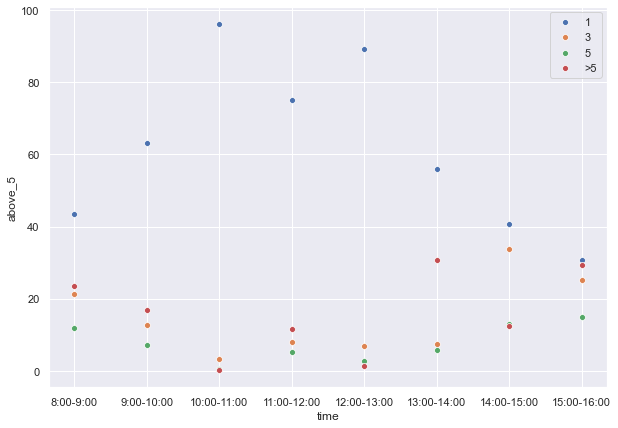

In [17]:
sns.scatterplot(x='time', y='upto_1',data=table,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table,label='2')
sns.scatterplot(x='time', y='upto_3',data=table,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table,label='4')
sns.scatterplot(x='time', y='upto_5',data=table,label='5')
sns.scatterplot(x='time', y='above_5',data=table,label='>5')
sns.set(rc={'figure.figsize':(10,8)})


plt.legend()






In [18]:
path = 'sim300l7v2.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 11
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table2.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    # table2.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table2.at[i, 'upto_3'] =100*(len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')])+len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')])) /len(x)
    # table2.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table2.at[i, 'upto_5'] =100*(len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')])+len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')])) /len(x)
    table2.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)

    
table2

,time,upto_1,upto_3,upto_5,above_5
0,11:00-12:00,86.688051,7.698476,3.207698,2.405774
1,12:00-13:00,96.206226,3.11284,0.583658,0.097276
2,13:00-14:00,72.575017,8.792742,6.350314,12.281926
3,14:00-15:00,77.714286,13.714286,6.204082,2.367347
4,15:00-16:00,80.510753,5.981183,4.704301,8.803763
5,16:00-17:00,30.053908,32.54717,16.374663,21.024259
6,17:00-18:00,10.596833,15.956151,12.606577,60.840438
7,18:00-19:00,46.625767,29.52454,11.503067,12.346626


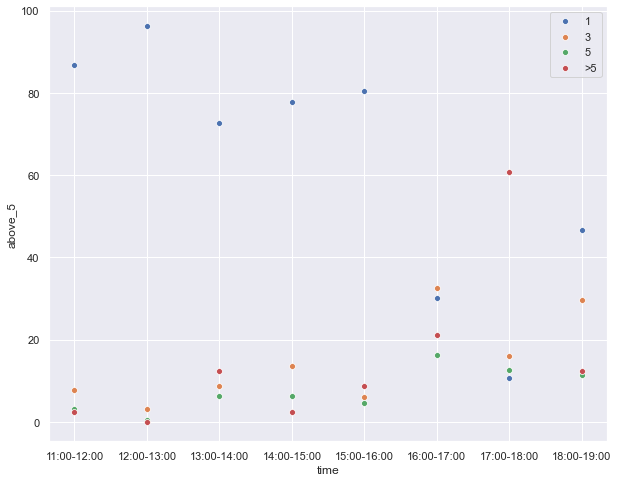

In [19]:
sns.scatterplot(x='time', y='upto_1',data=table2,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table2,label='2')
sns.scatterplot(x='time', y='upto_3',data=table2,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table2,label='4')
sns.scatterplot(x='time', y='upto_5',data=table2,label='5')
sns.scatterplot(x='time', y='above_5',data=table2,label='>5')
sns.set(rc={'figure.figsize':(15,8)})


plt.legend()






In [20]:
path = 'sim400l7.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 8
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    # table2.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table.at[i, 'upto_3'] =100*(len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')])+len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')])) /len(x)
    # table2.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table.at[i, 'upto_5'] =100*(len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')])+len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')])) /len(x)
    table.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)


table

,time,upto_1,upto_3,upto_5,above_5
0,8:00-9:00,72.597254,14.645309,6.407323,6.350114
1,9:00-10:00,88.839849,8.51198,2.143758,0.504414
2,10:00-11:00,100.0,0.0,0.0,0.0
3,11:00-12:00,95.621378,2.962009,0.579524,0.83709
4,12:00-13:00,98.139535,1.767442,0.093023,0.0
5,13:00-14:00,74.332765,6.303237,5.678592,13.685406
6,14:00-15:00,93.495935,4.403794,1.490515,0.609756
7,15:00-16:00,83.841132,6.528836,3.318825,6.311208


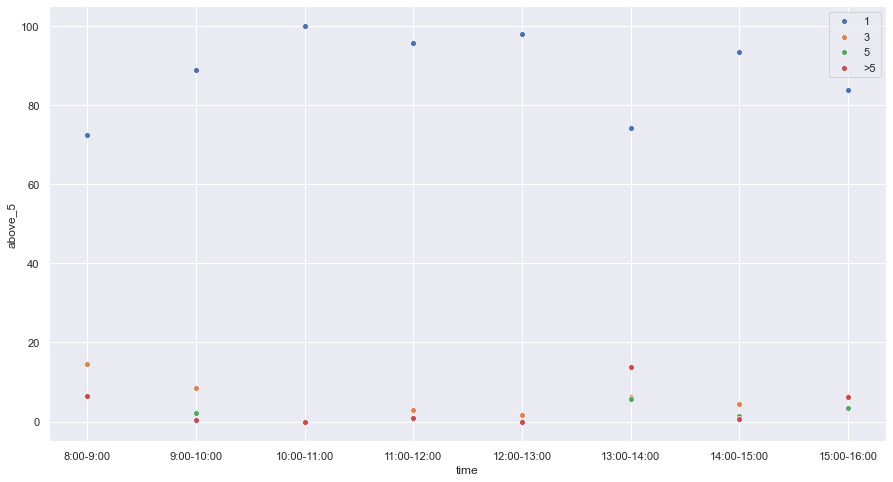

In [21]:
sns.scatterplot(x='time', y='upto_1',data=table,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table,label='2')
sns.scatterplot(x='time', y='upto_3',data=table,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table,label='4')
sns.scatterplot(x='time', y='upto_5',data=table,label='5')
sns.scatterplot(x='time', y='above_5',data=table,label='>5')
sns.set(rc={'figure.figsize':(5,5)})


plt.legend()






In [22]:
path = 'sim400l7v2.csv'
df = pd.read_csv(path)
df.time = df.apply(lambda row: pd.Timestamp(row.time), axis=1)

s = 11
j = 0
for i in range(0,8):
    x = df.loc[(pd.Timestamp('1900-01-01 0{}:00:00'.format(s+i))<df.time) & 
               (df.time<=pd.Timestamp('1900-01-01 0{}:00:00'.format(s+1+i)))].copy()
    
    table2.at[i, 'upto_1'] =100*len(x.loc[(x.bucket=='rej_upto1') | (x.bucket=='acc_upto1')]) /len(x)
    # table2.at[i, 'upto_2'] =100*len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')]) /len(x)
    table2.at[i, 'upto_3'] =100*(len(x.loc[(x.bucket=='rej_upto2') | (x.bucket=='acc_upto2')])+len(x.loc[(x.bucket=='rej_upto3') | (x.bucket=='acc_upto3')])) /len(x)
    # table2.at[i, 'upto_4'] =100*len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')]) /len(x)
    table2.at[i, 'upto_5'] =100*(len(x.loc[(x.bucket=='rej_upto4') | (x.bucket=='acc_upto4')])+len(x.loc[(x.bucket=='rej_upto5') | (x.bucket=='acc_upto5')])) /len(x)
    table2.at[i, 'above_5'] =100*len(x.loc[(x.bucket=='rej_above5') | (x.bucket=='acc_above5')]) /len(x)

    
table2

,time,upto_1,upto_3,upto_5,above_5
0,11:00-12:00,99.920446,0.079554,0.0,0.0
1,12:00-13:00,100.0,0.0,0.0,0.0
2,13:00-14:00,94.480103,4.107831,1.026958,0.385109
3,14:00-15:00,99.015587,0.902379,0.082034,0.0
4,15:00-16:00,97.234444,2.262728,0.439975,0.062854
5,16:00-17:00,98.884758,1.115242,0.0,0.0
6,17:00-18:00,37.476281,11.148008,8.444023,42.931689
7,18:00-19:00,87.267312,7.446016,2.903946,2.382725


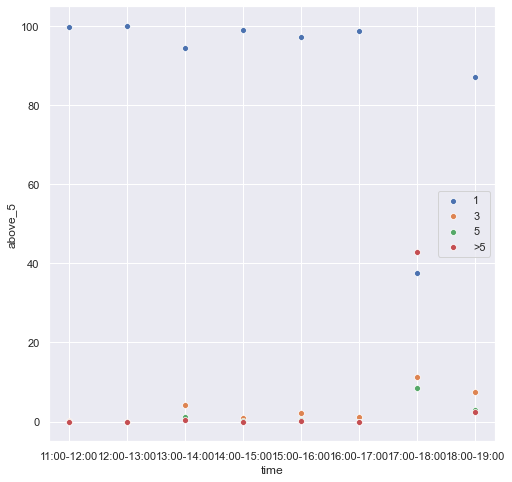

In [24]:
sns.scatterplot(x='time', y='upto_1',data=table2,label='1')
# sns.scatterplot(x='time', y='upto_2',data=table2,label='2')
sns.scatterplot(x='time', y='upto_3',data=table2,label='3')
# sns.scatterplot(x='time', y='upto_4',data=table2,label='4')
sns.scatterplot(x='time', y='upto_5',data=table2,label='5')
sns.scatterplot(x='time', y='above_5',data=table2,label='>5')
sns.set(rc={'figure.figsize':(10,8)})


plt.legend()




